In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay

In [2]:
data=pd.read_csv("./Car_Accident_Data.csv")

In [3]:
data.head()

,Dead / Alive,Head Injury Level,Made By,Model,Year,Chest,Left Leg,Right Leg,Driver or Paseanger,Protection,Power/Watt,Size of Car
0,Deceased,1855.0,Yugo,GV,87,45.0,NaN,701.0,Driver,manual belts,1850,mini
1,Alive,379.0,Yugo,GV,87,41.0,585.0,172.0,Passenger,manual belts,1850,mini
2,Deceased,2140.0,Volkswagen,Fox,87,52.0,723.0,450.0,Passenger,manual belts,2140,lt
3,Alive,1801.0,Volkswagen,Fox,87,52.0,484.0,924.0,Driver,manual belts,2140,lt
4,Alive,1184.0,Toyota,Pickup,87,57.0,437.0,364.0,Driver,manual belts,2508,pu


In [4]:
data.columns

Index(['Dead / Alive ', ' Head Injury Level', 'Made By', 'Model', 'Year',
       'Chest', 'Left Leg', 'Right Leg', 'Driver or Paseanger', 'Protection',
       'Power/Watt', 'Size of Car'],
      dtype='object')

In [5]:
data.rename(columns={
    'Dead / Alive ': 'Survival_Status',
    ' Head Injury Level':'Head Injury Level'
}, inplace=True)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Survival_Status      309 non-null    object 
 1   Head Injury Level    339 non-null    float64
 2   Made By              352 non-null    object 
 3   Model                352 non-null    object 
 4   Year                 352 non-null    int64  
 5   Chest                341 non-null    float64
 6   Left Leg             343 non-null    float64
 7   Right Leg            341 non-null    float64
 8   Driver or Paseanger  352 non-null    object 
 9   Protection           352 non-null    object 
 10  Power/Watt           352 non-null    int64  
 11  Size of Car          352 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 33.1+ KB


In [7]:
data.isnull().sum()

Survival_Status        43
Head Injury Level      13
Made By                 0
Model                   0
Year                    0
Chest                  11
Left Leg                9
Right Leg              11
Driver or Paseanger     0
Protection              0
Power/Watt              0
Size of Car             0
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
#Check for duplicated values
data.duplicated().sum()

0

In [10]:
data.describe()

,Head Injury Level,Year,Chest,Left Leg,Right Leg,Power/Watt
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,919.484099,88.939929,49.572438,1094.363958,766.689046,2916.752650
std,476.808676,1.416692,9.540742,567.948715,436.647986,601.103096
min,157.000000,87.000000,31.000000,122.000000,103.000000,1590.000000
25%,584.000000,88.000000,43.000000,694.500000,455.000000,2508.000000
50%,816.000000,89.000000,48.000000,1021.000000,663.000000,2850.000000
75%,1103.000000,90.000000,55.000000,1425.500000,999.500000,3287.000000
max,3665.000000,91.000000,97.000000,3347.000000,2856.000000,5619.000000


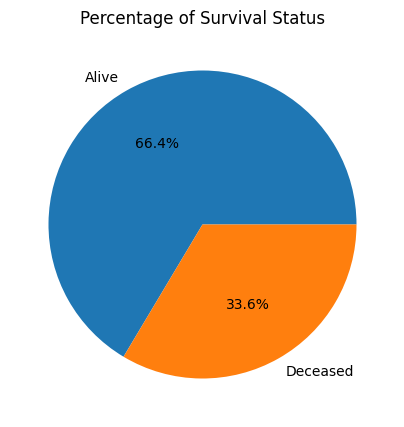

In [11]:
survival_status_counts = data['Survival_Status'].value_counts()
labels = survival_status_counts.index.to_list()

plt.figure(figsize=(5, 5))
plt.pie(survival_status_counts, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of Survival Status')
plt.show()


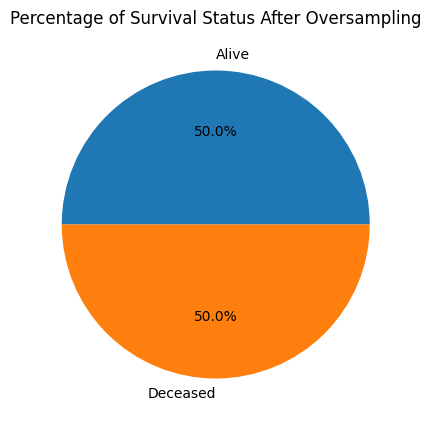

In [12]:
X = data.drop('Survival_Status', axis=1)
y = data['Survival_Status']

oversampler = RandomOverSampler(sampling_strategy='all')
X_resampled, y_resampled = oversampler.fit_resample(X, y)

data = pd.DataFrame(X_resampled, columns=X.columns)
data['Survival_Status'] = y_resampled

survival_status_counts = data['Survival_Status'].value_counts()
labels = survival_status_counts.index.to_list()

plt.figure(figsize=(5, 5))
plt.pie(survival_status_counts, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of Survival Status After Oversampling')
plt.show()


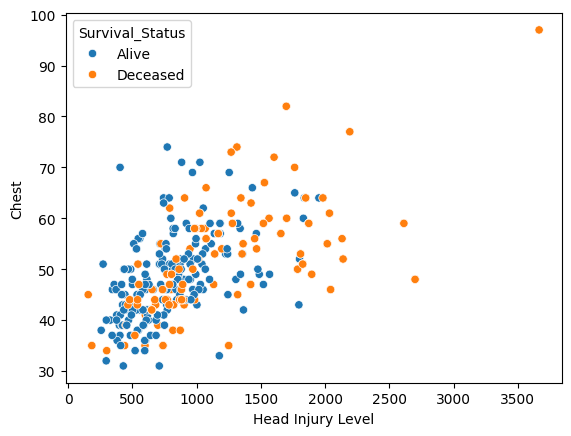

In [13]:
sns.scatterplot(data=data, x="Head Injury Level", y="Chest", hue="Survival_Status")
plt.show()

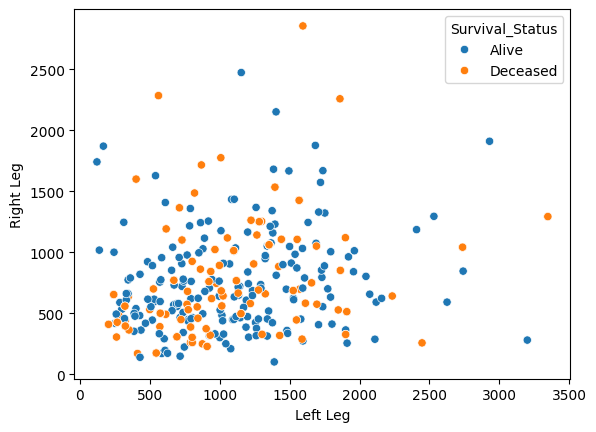

In [14]:
sns.scatterplot(data=data, x="Left Leg", y="Right Leg", hue="Survival_Status")
plt.show()


In [15]:
numerical_columns = data.select_dtypes(exclude='object').columns
print(f"Numerical columns: {numerical_columns}")

categorical_columns = data.select_dtypes(include='object').columns
print(f"categorical_columns: {categorical_columns}")

Numerical columns: Index(['Head Injury Level', 'Year', 'Chest', 'Left Leg', 'Right Leg',
       'Power/Watt'],
      dtype='object')
categorical_columns: Index(['Made By', 'Model', 'Driver or Paseanger', 'Protection', 'Size of Car',
       'Survival_Status'],
      dtype='object')


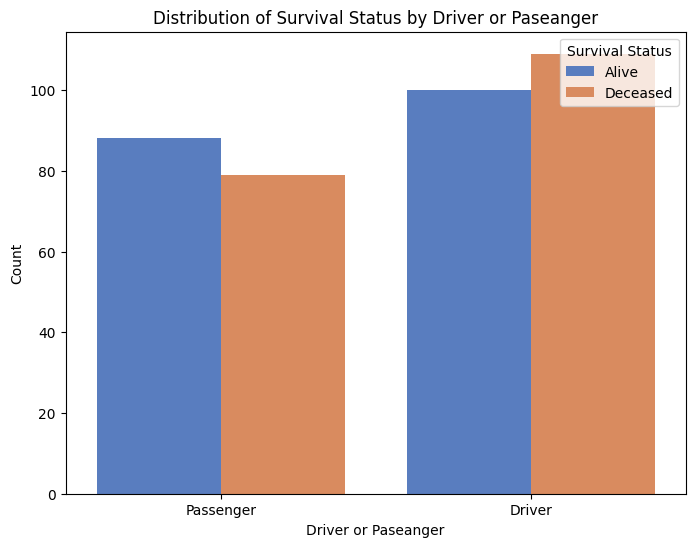

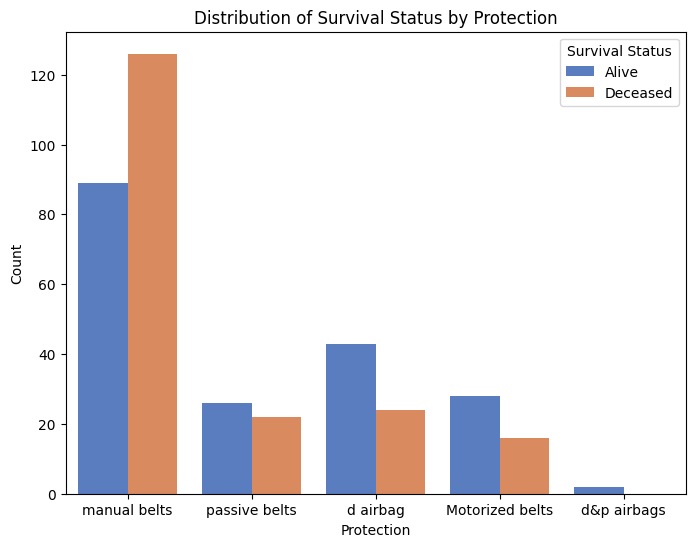

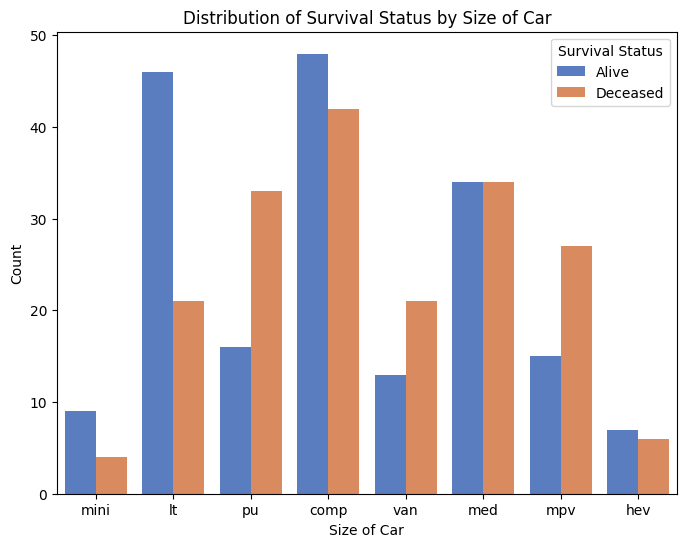

In [16]:
# Iterate through each categorical column and create countplots
for column in ['Driver or Paseanger', 'Protection', 'Size of Car']:
    plt.figure(figsize=(8, 6))  # Set the size of the figure
    sns.countplot(x=column, hue='Survival_Status', data=data, palette='muted')  # Create the countplot
    plt.title(f'Distribution of Survival Status by {column}')  # Set the title
    plt.xlabel(column)  # Set the x-axis label
    plt.ylabel('Count')  # Set the y-axis label
    plt.legend(title='Survival Status', loc='upper right')  # Add legend
    plt.show()  # Show the plot

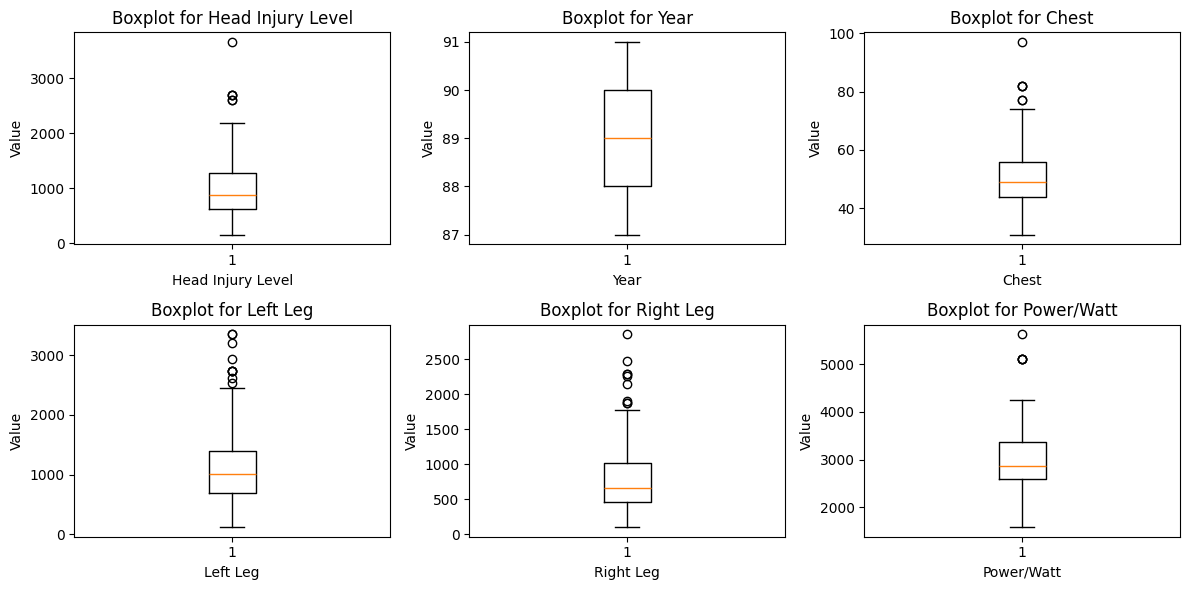

In [17]:
num_cols_per_row = 3
num_rows = int(np.ceil(len(numerical_columns) / num_cols_per_row))

fig, axes = plt.subplots(2, 3, figsize=(12, 6))

for i, col in enumerate(numerical_columns):
    row = i // num_cols_per_row
    col_idx = i % num_cols_per_row
    axes[row, col_idx].boxplot(data[col])
    axes[row, col_idx].set_title(f'Boxplot for {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Value')

fig.tight_layout()  # Prevent overlapping
plt.show()

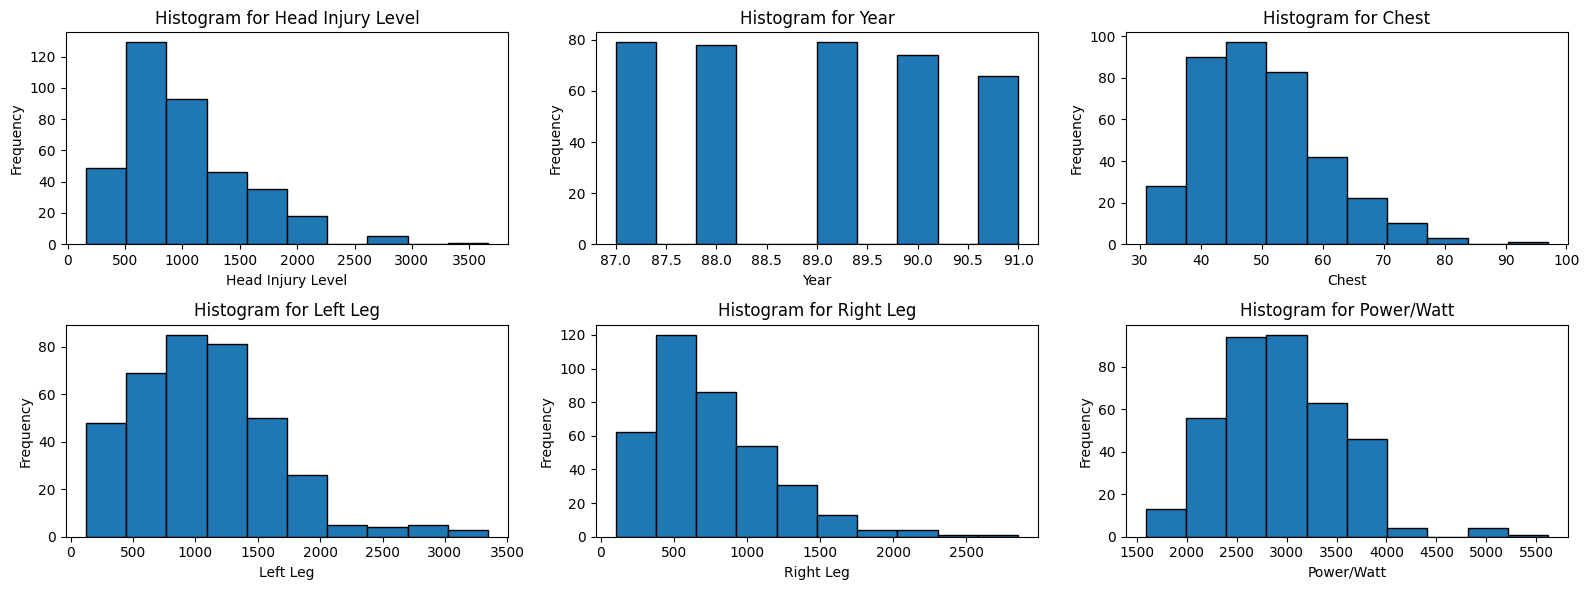

In [18]:
num_cols_per_row = 3
num_rows = int(np.ceil(len(numerical_columns) / num_cols_per_row))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(16, 6))

for i, col in enumerate(numerical_columns):
    row = i // num_cols_per_row
    col_idx = i % num_cols_per_row
    axes[row, col_idx].hist(data[col], bins=10, edgecolor='black')
    axes[row, col_idx].set_title(f'Histogram for {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')

fig.tight_layout()
plt.show()

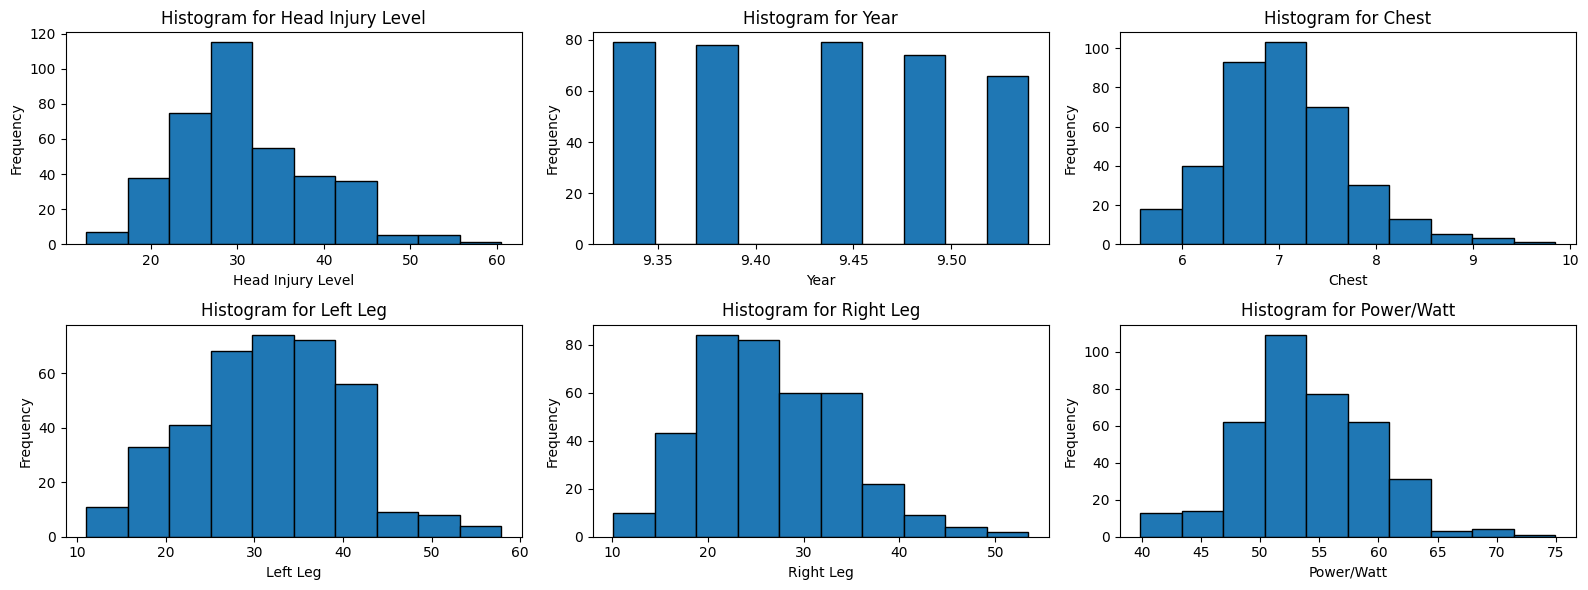

In [19]:
data[numerical_columns] = data[numerical_columns].apply(np.sqrt)

num_cols_per_row = 3
num_rows = int(np.ceil(len(numerical_columns) / num_cols_per_row))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(16, 6))

for i, col in enumerate(numerical_columns):
    row = i // num_cols_per_row
    col_idx = i % num_cols_per_row
    axes[row, col_idx].hist(data[col], bins=10, edgecolor='black')
    axes[row, col_idx].set_title(f'Histogram for {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')

fig.tight_layout()
plt.show()

In [20]:
def get_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return column[(column < lower_bound) | (column > upper_bound)]

In [21]:
# Replace the remaining outliers with the median
for col in numerical_columns:
    outliers = get_outliers(data[col])
    median_value = data[col].median()
    data.loc[outliers.index, col] = median_value

In [22]:
data['Survival_Status'] = data['Survival_Status'].map({'Alive': 1, 'Deceased': 0})

In [23]:
# Split the data into training and testing sets
X = data.drop('Survival_Status', axis=1)
y = data['Survival_Status']


In [24]:
# Scale the numerical columns
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [25]:
# Encode categorical columns
le = LabelEncoder()
for col in categorical_columns:
    if col != 'Survival_Status':
        X[col] = le.fit_transform(X[col])


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Cross-validation results: [0.77192982 0.75438596 0.73214286 0.73214286 0.78571429]
Mean accuracy: 0.7553
Standard deviation: 0.0213
Accuracy: 0.8085
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        51
           1       0.84      0.72      0.78        43

    accuracy                           0.81        94
   macro avg       0.81      0.80      0.80        94
weighted avg       0.81      0.81      0.81        94



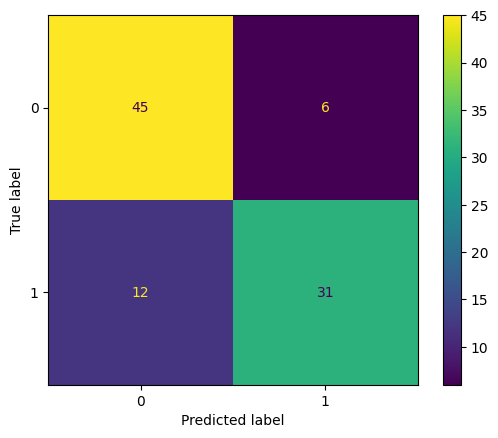

In [27]:
# Create an ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=110, random_state=42)

# Evaluate the model using cross-validation
kfold = 5
results = cross_val_score(clf, X_train, y_train, cv=kfold)

# Print the results
print(f"Cross-validation results: {results}")
print(f"Mean accuracy: {results.mean():.4f}")
print(f"Standard deviation: {results.std():.4f}")

# Train the final model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the predictions
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [28]:
def predict_survival_status(data):
  # Encode categorical columns
  for col in categorical_columns:
        if col != 'Survival_Status':
          data[col] = le.fit_transform(data[col])

  # Scale numerical columns
  data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

  # Make a prediction
  predictions = clf.predict(data)
  # Reverse mapping from numerical labels to actual class labels
  reverse_mapping = {1: 'Alive', 0: 'Deceased'}

  # Apply reverse mapping to get the actual class labels for predictions
  actual_predictions = [reverse_mapping[prediction] for prediction in predictions]
  # Return the predicted survival status
  return actual_predictions


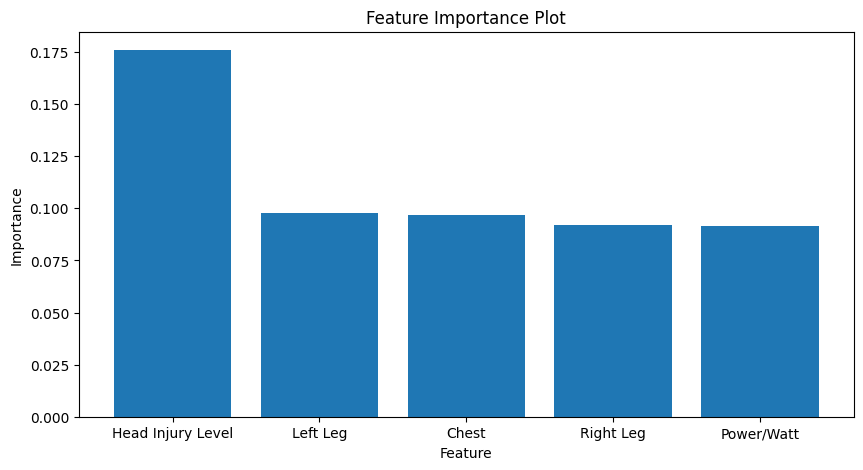

In [29]:
# Get feature importances
importances = clf.feature_importances_

# Create a DataFrame with feature names and importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame in descending order of importance
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Plot the top 5 features
plt.figure(figsize=(10, 5))
plt.bar(feature_importances_df['Feature'][:5], feature_importances_df['Importance'][:5])
plt.title('Feature Importance Plot')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


# PREDICTION BASED ON THE ABOVE DATASET

In [30]:
data_dict = {
    "Head Injury Level":1200,
    "Made By": "Volkswagen",
    "Model": "Passat",
    "Year": 88,
    "Chest": 200,
    "Left Leg": 810,
    "Right Leg": 1010,
    "Driver or Paseanger": "Driver",
    "Protection": "Manuel Belts",
    "Power/Watt": 2645,
    "Size of Car": "med",
}
to_predict= pd.DataFrame([data_dict])


In [31]:
predict_survival_status(to_predict)

['Alive']